<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Prediction Project

# Information

This project is based on this kaggle challenge, with the datasets provided on there as well: https://www.kaggle.com/c/predict-west-nile-virus/

This is the second notebook for this project.

In this notebook, the steps conducted are:
   1. Modelling
   2. Cost Benefit Analysis

# Background

The West Nile Virus (WNV) first appeared in the Americas in 1999, and has since become the **leading** mosquito-borne disease in the country ([source](https://www.nejm.org/doi/full/10.1056/NEJM200106143442401)). It is a virus transmitted to humans by mosquitoes that feed on infected birds. Around 20% of people who become infected with the virus develop symptoms ranging from fever, and headaches, to serious neurological illnesses that can result in death. The first WNV case was identified in Illinois in September 2001 when laboratory tests confirmed its presence in two crows found dead in the Chicago area. By the end of 2002, Illinois accounted for more human cases and deaths than any other state ([source](https://dph.illinois.gov/topics-services/diseases-and-conditions/west-nile-virus)). Since there is no vaccine or medication to prevent or treat WNV in people, the most effective way to prevent this virus is to reduce the number of mosquitoes and to take precautions to avoid mosquito bites ([source](https://www.cdc.gov/westnile/index.html#:~:text=There%20are%20no%20vaccines%20to,a%20fever%20and%20other%20symptoms.)). 

Following the outbreak of WNV in Chicago, the City of Chicago and Chicago Department of Public Health (CDPH) put in place a comprehensive surveillance and control program to trap and test mosquitos for WNV. This program is still in place today.

# Problem Statement

In light of the potential outbreak of West Nile Virus (WNV) in Chicago, the CDPH has asked its data scientist team to develop a predictive model based on past data on weather conditions and virus detection locations.

Given the use of public funds to finance the spraying of pesticide in order to  reduce the number of WNV cases, coupled with the potentially high cost of spraying pesticide over large areas, it is imperative for this project to bring focus to where and when pesticides should be sprayed that would effectively combat the WNV problem.

A model that accurately predicts the outbreak of the virus using information about the locations of mosquito traps and weather information ensures that the targeted spraying will be informed and well-justified.

## Recap of Notebook 1

To recap, the goal of this project is to develop a predictive model based on past data on weather conditions and virus detection locations. Given the use of public funds to finance the spraying of pesticide in order to reduce the number of WNV cases, coupled with the pontentially high cost of spraying pesticide over large areas, it is imperative for this project to bring focus to where and when pesticides should be sprayed that would effectively combat the WNV problem.

The below features are identified for modeling consideration:

|Feature                        | Description |
|:------------------------------|:---------------------|
|Latitude                       |Latitude|
|Longitude                      |Longitude|
|Week                           |Week of the Year|
|Tavg                           |Average Temperature|
|DewPoint                       |Average Dew Point Temperature|
|WetBulb                        |Average Wet Bulb Temperature|
|PrecipTotal                    |Precipitation|
|StnPressure                    |Average Station Pressure|
|SeaLevel                       |Average Sea Level Pressure|
|ResultSpeed                    |Resultant Wind Speed|
|ResultDir                      |Resultant Direction|
|AvgSpeed                       |Average Wind Speed|
|CsTSRA                         |Significant Weather Type Thunderstorm and Rain|
|CsRA                           |Significant Weather Type Rain|
|CsTS                           |Significant Weather Type Thunderstorm|
|CsBR                           |Significant Weather Type Mist|
|RelativeHumidity               |Relative Humidity|
|NightTime                      |Hours in the nighttime|
|DayTime                        |Hours in the daytime|
|Tavg_7daysbf                   |Average Temperature 7 days lag|
|DewPoint_7daysbf               |Dew Point 7 days lag|
|PrecipTotal_7daysbf            |Precipitation 7 days lag|
|Species_CULEX PIPIENS          |Mosquito species Culex Pipiens|
|Species_CULEX PIPIENS/RESTUANS |Mosquito species Culex Pipiens / Restuans|
|Species_CULEX RESTUANS         |Mosquito species Culex Restuans|
|WnvRisk_low                    |Between 0 to 2 WNV cases|
|WnvRisk_medium                 |Between 3 to 5 WNV cases|
|WnvRisk_high                   |More than 5 WNV cases|



In this Notebook, we will cover:
- Modeling using Logistic Regression, Random Forest, AdaBoost, Gradient Boost, XgBoost, KNN and Support Vector Machine. To handle the imbalanced dataset, we will adopt SMOTE method.
- Identify the feature importance.
- Provide the cost analysis benefits, conclusions, recommendations, limitations and future plans.

## Import Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
from pandas import MultiIndex, Int64Index
import scipy

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style = 'whitegrid') # set theme to be whitegrid

import datetime
from datetime import datetime

# For modeling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

# For metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set the max display for the columns and rows
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

import warnings
warnings.filterwarnings('ignore')

C:\Users\Joel\AppData\Local\Temp\ipykernel_15848\3220175555.py:3: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Import train and test datasets
df_train_model = pd.read_csv('../data/df_train_model.csv')
df_test_model = pd.read_csv('../data/df_test_model.csv')

In [3]:
# Check first 5 rows for df_train_model
df_train_model.head()

,Latitude,Longitude,WnvPresent,Week,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,CsTSRA,CsBR,CsRA,CsTS,RelativeHumidity,NightTime,DayTime,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,WnvRisk_low,WnvRisk_medium,WnvRisk_high
0,41.954690,-87.800991,0,22,74.0,58,65.0,0.0,29.39,30.11,5.8,18,6.5,0,1,0,0,57.398449,9.066667,14.933333,0.0,0,0.0,0,1,0,0,0,1
1,41.954690,-87.800991,0,22,74.0,58,65.0,0.0,29.39,30.11,5.8,18,6.5,0,1,0,0,57.398449,9.066667,14.933333,0.0,0,0.0,0,0,1,0,0,1
2,41.994991,-87.769279,0,22,74.0,58,65.0,0.0,29.39,30.11,5.8,18,6.5,0,1,0,0,57.398449,9.066667,14.933333,0.0,0,0.0,0,0,1,1,0,0
3,41.974089,-87.824812,0,22,74.0,58,65.0,0.0,29.39,30.11,5.8,18,6.5,0,1,0,0,57.398449,9.066667,14.933333,0.0,0,0.0,0,1,0,0,1,0
4,41.974089,-87.824812,0,22,74.0,58,65.0,0.0,29.39,30.11,5.8,18,6.5,0,1,0,0,57.398449,9.066667,14.933333,0.0,0,0.0,0,0,1,0,1,0


In [4]:
# Check preliminary information for df_train_model
df_train_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        8475 non-null   float64
 1   Longitude                       8475 non-null   float64
 2   WnvPresent                      8475 non-null   int64  
 3   Week                            8475 non-null   int64  
 4   Tavg                            8475 non-null   float64
 5   DewPoint                        8475 non-null   int64  
 6   WetBulb                         8475 non-null   float64
 7   PrecipTotal                     8475 non-null   float64
 8   StnPressure                     8475 non-null   float64
 9   SeaLevel                        8475 non-null   float64
 10  ResultSpeed                     8475 non-null   float64
 11  ResultDir                       8475 non-null   int64  
 12  AvgSpeed                        84

In [5]:
# Check first 5 rows for df_test_model
df_test_model.head()

,Id,Latitude,Longitude,Week,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,CsTSRA,CsBR,CsRA,CsTS,RelativeHumidity,NightTime,DayTime,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,WnvRisk_low,WnvRisk_medium,WnvRisk_high
0,1,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,1,0,0,0,1
1,2,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,0,1,0,0,1
2,3,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,1,0,0,0,0,1
3,4,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,0,0,0,0,1
4,5,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,0,0,0,0,1


In [6]:
# Check preliminary information for df_test_model
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              116293 non-null  int64  
 1   Latitude                        116293 non-null  float64
 2   Longitude                       116293 non-null  float64
 3   Week                            116293 non-null  int64  
 4   Tavg                            116293 non-null  float64
 5   DewPoint                        116293 non-null  int64  
 6   WetBulb                         116293 non-null  float64
 7   PrecipTotal                     116293 non-null  float64
 8   StnPressure                     116293 non-null  float64
 9   SeaLevel                        116293 non-null  float64
 10  ResultSpeed                     116293 non-null  float64
 11  ResultDir                       116293 non-null  int64  
 12  AvgSpeed        

In [7]:
# Reset index with Id
df_test_model.set_index(keys = ['Id'], inplace = True)

In [8]:
df_test_model.head()

,Latitude,Longitude,Week,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,CsTSRA,CsBR,CsRA,CsTS,RelativeHumidity,NightTime,DayTime,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,WnvRisk_low,WnvRisk_medium,WnvRisk_high
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,1,0,0,0,1
2,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,0,1,0,0,1
3,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,1,0,0,0,0,1
4,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,0,0,0,0,1
5,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,0,0,0,0,1


In [9]:
# Check whether the dataset target is balanced
df_train_model['WnvPresent'].value_counts(normalize = True)

0    0.956342
1    0.043658
Name: WnvPresent, dtype: float64

The dataset is highly imbalance with only 4.4% of West Nile Virus presence.

## Dataset Preparation

### Train/Test Split

In [10]:
# Create X and y variables
X = df_train_model.drop(columns = ['WnvPresent'])
y = df_train_model['WnvPresent']

In [11]:
# Split the dataset by 0.75 and 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = 123)

# Check the shape of both train and val datasets
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6356, 28) (2119, 28) (6356,) (2119,)


### Standard Scaling

In [12]:
# Scale the data
ss = StandardScaler()

# Fit and transform the data
Xs_train = ss.fit_transform(X_train)
Xs_val = ss.transform(X_val)

In [13]:
Xs_val

array([[ 1.30084764, -0.3938165 ,  0.0657385 , ..., -0.54486529,
        -0.93448836,  1.50985753],
       [ 1.53572688, -1.32805444,  0.27729998, ..., -0.54486529,
        -0.93448836,  1.50985753],
       [-0.68180036,  1.11941536, -0.14582298, ..., -0.54486529,
         1.07010429, -0.66231415],
       ...,
       [ 1.30084764, -0.3938165 , -1.41519186, ..., -0.54486529,
        -0.93448836,  1.50985753],
       [ 0.53431133,  0.08317431,  0.91198442, ..., -0.54486529,
         1.07010429, -0.66231415],
       [-1.11985056,  1.30282411,  1.1235459 , ..., -0.54486529,
         1.07010429, -0.66231415]])

## Functions for modeling evaluation

In [14]:
# Create a function to print data on the metrics
def metrics(y_test, y_predict):
    print('Accuracy score:', round(accuracy_score(y_val, y_predict), 4), '\n')
    print('ROC AUC score:', round(roc_auc_score(y_val, y_predict), 4), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_val, y_predict))
    print('-----------------------------------------------------------------')

In [15]:
# Create a function to plot the confusion matrix
def plot_confusion_matrix(y_val, y_predict):
    cm = confusion_matrix(y_val, y_predict)
    
    # Modify the matrix to include the labels
    modified_cm = []
    for index, value in enumerate(cm):
        if index == 0:
            modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
        if index == 1:
            modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])       
    
    # Print the matrix
    plt.figure(figsize = (8, 8))
    labels = ['WNV Non-Presence', 'WNV Presence']
    sns.heatmap(cm, annot = np.array(modified_cm), cmap = 'Blues', fmt = "", 
                xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion matrix', fontsize = 16, fontweight = 'bold')
    plt.tick_params(labelsize = 12)

In [16]:
# Create a fuction to run and evaluate the model. Return the results for best model, best parameters and metrics
def model_eval(pipe, params):

    # Initialize gridsearch for the model based on parameters defined
    gs = GridSearchCV(pipe, param_grid = params, cv = 5, scoring = 'roc_auc', verbose = 1, n_jobs = -1)

    # Fit the model
    gs.fit(X_train, y_train)

    # Get the best parameters
    best_params = gs.best_params_

    # Get the best model
    best_model = gs.best_estimator_

    # Predict validation set
    pred = best_model.predict(X_val)

    # Metrics
    metrics = {} # Create a dictionary to hold the metric data
    train_pred_prob = best_model.predict_proba(X_train)[:,1]
    val_pred_prob = best_model.predict_proba(X_val)[:,1]
    tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    metrics['roc_auc_train'] = round(roc_auc_score(y_train, train_pred_prob), 4)
    metrics['roc_auc_val'] = round(roc_auc_score(y_val, val_pred_prob), 4)
    metrics['f1_score'] = round((2 * recall * precision) / (recall + precision), 4)
    metrics['precision'] = round(precision, 4)
    metrics['sensitivity'] = round(recall, 4)
    metrics['specificity'] = round(tn / (tn + fp), 4)
    metrics['false_pos'] = fp
    metrics['true_pos'] = tp
    metrics['false_neg'] = fn
    metrics['true_neg'] = tn
    
    # Plot Confusion Matrix
    plot_confusion_matrix(y_val, pred)
    plt.show()
    
    # Plot ROC graph
    RocCurveDisplay.from_estimator(best_model, X_val, y_val)
    plt.plot([0, 1], [0, 1], linestyle = '--', label = 'baseline')
    plt.title('ROC Curve', fontsize = 16, fontweight = 'bold')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 4)
    plt.show()
 
    return (best_model, best_params, metrics)

## Baseline model - Logistic Regression

Logistic Regression is a common binary classification algorithm where it uses the weighted combination of the input features and passes them through a sigmoid function. Sigmoid function transforms any real number input, to a number between 0 and 1. It is also a simple algorithm and it iterates over the data until it converges. We will use this model as our baseline model.

In [17]:
# Instantiate, fit and predit using Logistic Regression model (Baseline model)
lr = LogisticRegression()
lr.fit(Xs_train, y_train)
lr_preds = lr.predict(Xs_val)

In [18]:
metrics(y_val, lr_preds)

Accuracy score: 0.9561 

ROC AUC score: 0.5 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2026
           1       0.00      0.00      0.00        93

    accuracy                           0.96      2119
   macro avg       0.48      0.50      0.49      2119
weighted avg       0.91      0.96      0.93      2119

-----------------------------------------------------------------


- The accuracy score is high (95.6%) but the ROC score is low (0.5). The precision and recall score is 0 as there is no predicted samples due to an imbalanced dataset. This shows the model does not accurately predict the target 1 correctly with the dataset because the model is biased and predicts the target 0 for every sample. 
- In order to handle the imbalanced dataset, we will adopt the Synthetic Minority Oversampling Technique (SMOTE).

### Synthetic Minority Oversampling Technique (SMOTE)

SMOTE is one of the methods used to handle imbalanced dataset. This approach works by first finding its k nearest neighbour in the minority class neigbours and create synthetic samples at selecting examples that are close to it and connect the 2 points and drawing a new sample at a point along that line. 

In [19]:
# Create synthetic data for train set using SMOTE
sm = SMOTE(random_state = 123)
Xsm_train, ysm_train = sm.fit_resample(Xs_train, y_train)

In [20]:
# Check the shape of train dataset after smoting
print(Xsm_train.shape, ysm_train.shape)

(12158, 28) (12158,)


In [21]:
# Confirm if the dataset has been balanced
print(pd.Series(ysm_train).value_counts())

0    6079
1    6079
Name: WnvPresent, dtype: int64


The number of data increased to 12,158 instead of the initial 6,356 after smoting.

In [22]:
# Fit and predict using Logistic Regression model with the SMOTE dataset
lr.fit(Xsm_train, ysm_train)
lr_preds_2 = lr.predict(Xs_val)

In [23]:
# Print the score
lr.score(Xsm_train, ysm_train)

0.7872182924823161

In [24]:
# Print the metrics
metrics(y_val, lr_preds_2)

Accuracy score: 0.7112 

ROC AUC score: 0.7771 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      2026
           1       0.12      0.85      0.21        93

    accuracy                           0.71      2119
   macro avg       0.55      0.78      0.51      2119
weighted avg       0.95      0.71      0.80      2119

-----------------------------------------------------------------


- The ROC score has improved to 0.7771. This shows the SMOTE is effective in handling the imbalanced dataset.
- We will tune the hyperparameter to see if the score will improve further.

### Logistic Regression Hyperparameter Tuning

In [25]:
# Set up a pipeline:
# 1. Standard scaling
# 2. SMOTE sampling
# 3. Logistic Regression

lr_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('sampling', SMOTE()),
        ('lr', LogisticRegression(solver = 'liblinear'))
    ])

In [26]:
# Set up hyperparameters tuning                    (Refer to comments for original parameters)
lr_params = {
    'sampling__sampling_strategy': ['minority'],   # ['auto', 'minority']
    'sampling__k_neighbors': [2],                  # [2, 3, 5]
    'lr__C': [1],                                  # [0.1, 0.3, 0.5, 1]
    'lr__penalty': ['l1']                          # ['l1','l2']
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


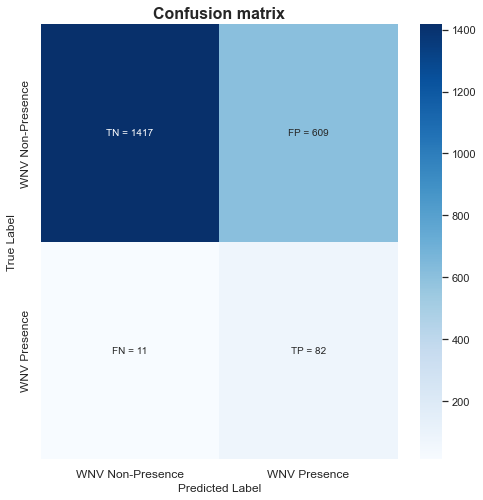

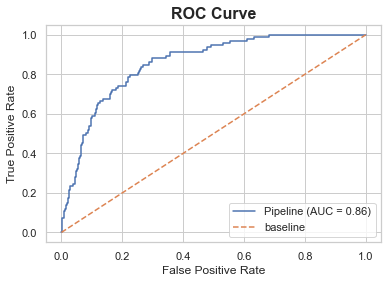

{'lr__C': 1, 'lr__penalty': 'l1', 'sampling__k_neighbors': 2, 'sampling__sampling_strategy': 'minority'}


,Logistic Regression
roc_auc_train,0.8385
roc_auc_val,0.8574
f1_score,0.2092
precision,0.1187
sensitivity,0.8817
specificity,0.6994
false_pos,609.0000
true_pos,82.0000
false_neg,11.0000
true_neg,1417.0000


In [27]:
# Run the logistic regression model
best_model_lr, best_params_lr, metrics_lr = model_eval(lr_pipe, lr_params)
print(best_params_lr)

# Convert metrics result to dataframe
lr_df = pd.DataFrame.from_dict(metrics_lr, orient = 'index', columns = ['Logistic Regression'])
lr_df

With hyperparameter tuning, the ROC AUC score has further improved to 0.8574.

## Random Forest Model

Random Forest is another supervised learning algorithm that can be used for classification. As the name suggests, this algorithm creates multiple decision trees on randomly selected samples and get prediction from each tree. Each tree will have equal votes and tree with the most votes is chosen as the final result.

In [28]:
# Set up a pipeline:
# 1. Standard scaling
# 2. SMOTE sampling
# 3. Random Forest

rf_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('sampling', SMOTE()),
        ('rf', RandomForestClassifier())
    ])

In [29]:
# Set up hyperparameters tuning                    (Refer to comments for original parameters)
rf_params = {
    'sampling__sampling_strategy': ['minority'],   # ['not minority']
    'sampling__k_neighbors': [3],                  # range(2, 5)
    'rf__n_estimators':[175],                      # range(150, 250, 25)
    'rf__max_depth':[10],                          # range(4, 11)
    'rf__min_samples_leaf': [16],                  # range(4, 20, 2)
    'rf__random_state':[123]                       # [123]
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


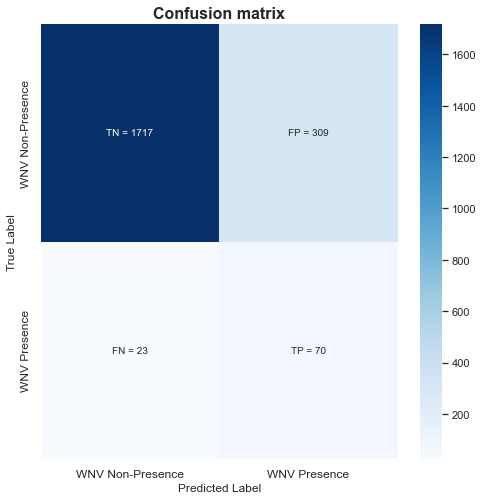

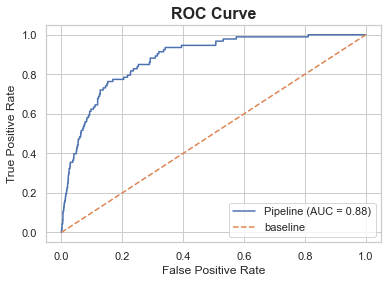

{'rf__max_depth': 10, 'rf__min_samples_leaf': 16, 'rf__n_estimators': 175, 'rf__random_state': 123, 'sampling__k_neighbors': 3, 'sampling__sampling_strategy': 'minority'}


,Random Forest
roc_auc_train,0.9177
roc_auc_val,0.8781
f1_score,0.2966
precision,0.1847
sensitivity,0.7527
specificity,0.8475
false_pos,309.0000
true_pos,70.0000
false_neg,23.0000
true_neg,1717.0000


In [30]:
# Run the random forest model 
best_model_rf, best_params_rf, metrics_rf = model_eval(rf_pipe, rf_params)
print(best_params_rf)

# Convert metrics result to dataframe
rf_df = pd.DataFrame.from_dict(metrics_rf, orient = 'index', columns = ['Random Forest'])
rf_df

## AdaBoost Model

AdaBoost is a boosting ensemble model that works well with the decision tree. This model learns the previous misclassified data and increase the weight of the misclassification for the next model. The process iterates until the specified maximum number of estimators is reached or it has no error. The final model is a combination of all the learning algorithms built.

In [31]:
# Set up a pipeline:
# 1. Standard scaling
# 2. SMOTE sampling
# 3. Ada Boost

ada_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('sampling', SMOTE()),
        ('ada', AdaBoostClassifier())
    ])

In [32]:
# Set up hyperparameters tuning                             (Refer to comments for original parameters)
ada_params = {
    'sampling__sampling_strategy': ['minority'],            # ['auto', 'minority']
    'sampling__k_neighbors': [5],                           # [2, 3, 5]
    'ada__learning_rate': [0.5],                            # [0.1, 0.25, 0.5] 
    'ada__n_estimators': [200],                             # [100, 150, 200]
    'ada__random_state': [123]                              # [123]
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


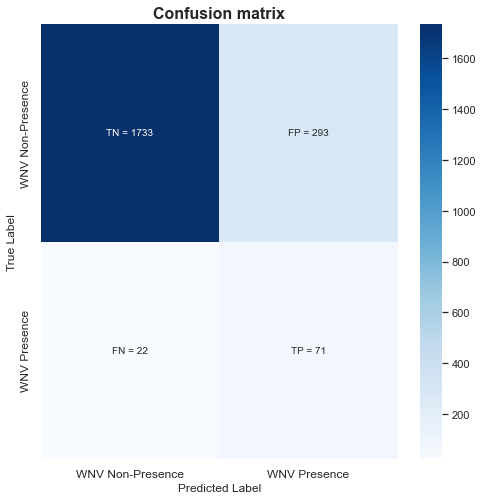

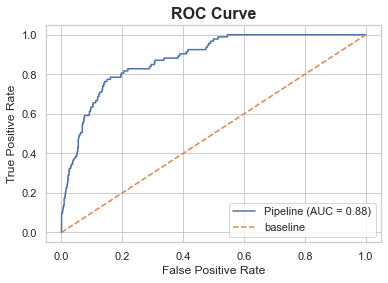

{'ada__learning_rate': 0.5, 'ada__n_estimators': 200, 'ada__random_state': 123, 'sampling__k_neighbors': 5, 'sampling__sampling_strategy': 'minority'}


,Ada Boost
roc_auc_train,0.8771
roc_auc_val,0.8781
f1_score,0.3107
precision,0.1951
sensitivity,0.7634
specificity,0.8554
false_pos,293.0000
true_pos,71.0000
false_neg,22.0000
true_neg,1733.0000


In [33]:
# Run ada boost model
best_model_ada, best_params_ada, metrics_ada = model_eval(ada_pipe, ada_params)
print(best_params_ada)

# Convert metrics result to dataframe
ada_df = pd.DataFrame.from_dict(metrics_ada, orient = 'index', columns = ['Ada Boost'])
ada_df

## Gradient Boost Model

Gradient Boost is another boosting ensemble model that takes an iterative approach to combining weak learners to create a strong learner by focusing on mistakes of prior iterations. For Gradient Boost, all the models are weighed equally and their predictive capacity is restricted with learning rate to increase accuracy. 

In [34]:
# Set up a pipeline:
# 1. Standard scaling
# 2. SMOTE sampling
# 3. Gradient Boost

gb_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('sampling', SMOTE()),
        ('gb', GradientBoostingClassifier())
    ])

In [35]:
# Set up hyperparameters tuning               (Refer to comments for original parameters)
gb_params = {
    'sampling__sampling_strategy': ['auto'],  # ['auto', 'minority']                  
    'sampling__k_neighbors': [5],             # [2, 3, 5]
    'gb__learning_rate': [0.1],               # [0.1, 0.25, 0.5]              
    'gb__n_estimators': [150],                # [100, 150, 200, 300]
    'gb__max_depth': [3],                     # [3, 5, 7]
    'gb__random_state': [123]                 # [123]
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


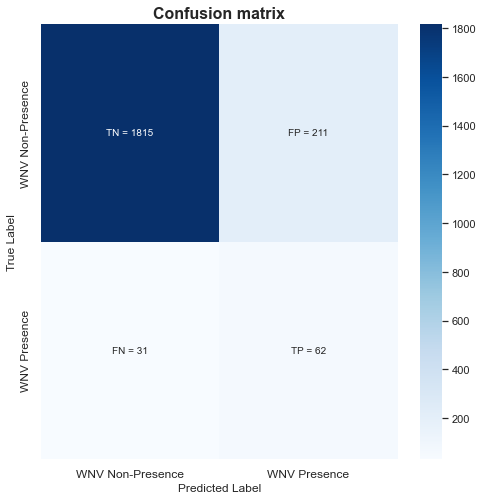

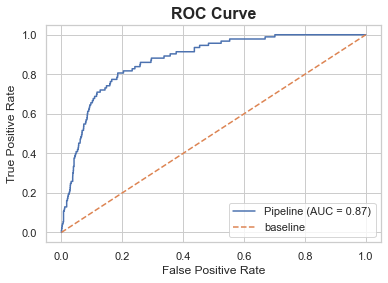

{'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 150, 'gb__random_state': 123, 'sampling__k_neighbors': 5, 'sampling__sampling_strategy': 'auto'}


,Gradient Boost
roc_auc_train,0.9072
roc_auc_val,0.8737
f1_score,0.3388
precision,0.2271
sensitivity,0.6667
specificity,0.8959
false_pos,211.0000
true_pos,62.0000
false_neg,31.0000
true_neg,1815.0000


In [36]:
# Run the gradient boost model
best_model_gb, best_params_gb, metrics_gb = model_eval(gb_pipe, gb_params)
print(best_params_gb)

# Convert metrics result to dataframe
gb_df = pd.DataFrame.from_dict(metrics_gb, orient = 'index', columns = ['Gradient Boost'])
gb_df

## XGBoost Model

XGBoost, also known as eXtreme Gradient Boosting, is an implementation of gradient boosted decision trees designed for speed and performance. Similar to Gradient Boosting, it is an ensemble tree method that applies the principle of boosting weak learners using the gradient descent architecture. 

In [37]:
# Set up a pipeline:
# 1. Standard scaling
# 2. SMOTE sampling
# 3. XG Boost

xgb_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('sampling', SMOTE(random_state = 123, sampling_strategy = 'minority')),
        ('xgb', XGBClassifier(objective = 'binary:logistic',
                              scale_pos_weight = 1,
                              seed = 123,
                              booster = 'gbtree',
                              eval_metric = 'auc', 
                              use_label_encoder = False,
                              n_jobs = -1))
    ])

In [38]:
# Set up hyperparameters tuning                    (Refer to comments for original parameters)
xgb_params = {
    'sampling__k_neighbors': [5],                  # [2, 3, 5]
    'xgb__n_estimators': [1000],                   # [300,700,900,1000,1200]
    'xgb__max_depth': [1],                         # [1,3,5,7]
    'xgb__min_child_weight': [4],                  # [2,3,4]
    'xgb__learning_rate': [0.1],                   # [0.1, 0.01, 0.001]
    'xgb__colsample_bytree': [0.5],                # [0.5, 1.0]
    'xgb__subsample': [1.0],                       # [0.6, 0.8, 1.0]
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


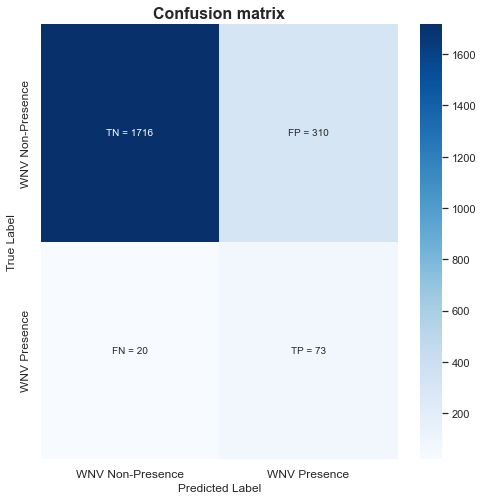

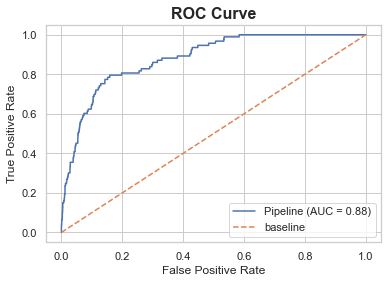

{'sampling__k_neighbors': 5, 'xgb__colsample_bytree': 0.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 1, 'xgb__min_child_weight': 4, 'xgb__n_estimators': 1000, 'xgb__subsample': 1.0}


,XGBoost
roc_auc_train,0.8762
roc_auc_val,0.8805
f1_score,0.3067
precision,0.1906
sensitivity,0.7849
specificity,0.8470
false_pos,310.0000
true_pos,73.0000
false_neg,20.0000
true_neg,1716.0000


In [39]:
# Run the XG boost model
best_model_xgb, best_params_xgb, metrics_xgb = model_eval(xgb_pipe, xgb_params)
print(best_params_xgb)

# Convert metrics result to dataframe
xgb_df = pd.DataFrame.from_dict(metrics_xgb, orient = 'index', columns = ['XGBoost'])
xgb_df

## Support Vector Machine (SVM)
SVM is used for classification and regression problems. The model maps training data to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In [40]:
# Set up a pipeline:
# 1. Standard scaling
# 2. SMOTE sampling
# 3. SVM

svc_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('sampling', SMOTE(n_jobs = -1)),
        ('svc', SVC())
    ])

In [41]:
# Set up hyperparameters tuning                    (Refer to comments for original parameters)

svc_params = {
    'sampling__sampling_strategy': ['minority'],   # ['minority']
    'sampling__k_neighbors': [2],                  # [1, 2, 4, 5]
    'svc__gamma':['auto'],                         # []'auto','scale']
    'svc__kernel':['rbf'],                         # ['rbf', 'linear', 'poly', 'sigmoid']
    'svc__random_state': [123],                    # [123]
    'svc__probability' : [True],                   # [True]    # Cannot run when False
    'svc__C' : [0.1],                              # [0.01, 0.1, 1, 2]
    'svc__shrinking' : [True],                     # [True, False]
    'svc__class_weight' : ['balanced'],            # ['balanced', None]
    
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


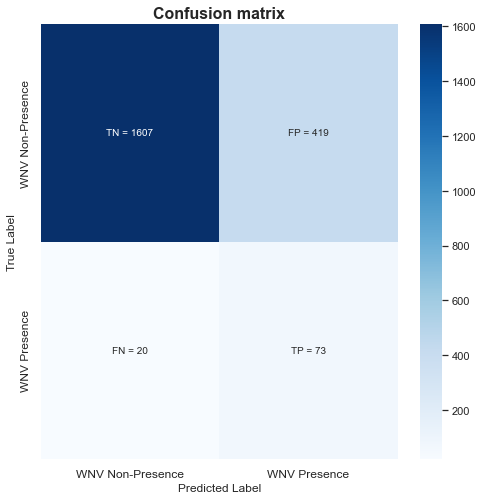

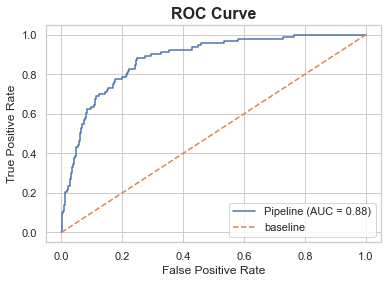

{'sampling__k_neighbors': 2, 'sampling__sampling_strategy': 'minority', 'svc__C': 0.1, 'svc__class_weight': 'balanced', 'svc__gamma': 'auto', 'svc__kernel': 'rbf', 'svc__probability': True, 'svc__random_state': 123, 'svc__shrinking': True}
CPU times: total: 55 s
Wall time: 2min 37s


,SVM
roc_auc_train,0.8941
roc_auc_val,0.8767
f1_score,0.2496
precision,0.1484
sensitivity,0.7849
specificity,0.7932
false_pos,419.0000
true_pos,73.0000
false_neg,20.0000
true_neg,1607.0000


In [42]:
%%time
# Run the SVM model

# Run the support vector machine model
best_model_svc, best_params_svc, metrics_svc = model_eval(svc_pipe, svc_params)
print(best_params_svc)

# Convert metrics result to dataframe
svc_df = pd.DataFrame.from_dict(metrics_svc, orient = 'index', columns = ['SVM'])
svc_df

## K-Nearest Neighbor

The k-Nearest neighbor (kNN) algorithm is a supervised machine learning algorithm used for classification and regression. In the context of classification, a class label is assigned on the basis of a majority vote i.e. the label that is most frequently represented around a given data point is used.

In [43]:
# Set up a pipeline:
# 1. Standard scaling
# 2. SMOTE sampling
# 3. KNN

knn_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('sampling', SMOTE(n_jobs = -1)),
        ('knn', KNeighborsClassifier())
    ])

In [44]:
# Set up hyperparameters tuning                    (Refer to comments for original parameters)

knn_params = {
    'sampling__sampling_strategy': ['minority'],   # ['minority']
    'sampling__k_neighbors': [30],                 # [20, 30, 40, 50, 60, 70, 100]
    'knn__n_neighbors': [30],                      # [5,10,20, 30, 40]
    'knn__algorithm': ['brute'],                   # ['ball_tree', 'kd_tree', 'brute', 'auto']
    'knn__weights': ['uniform'],                   # ['distance', 'uniform']
    'knn__p': [1],                                 # [1, 2]
    'knn__leaf_size': [30],                        # [10, 20, 30, 40, 50]
    'knn__metric' : ['minkowski']     # ['manhattan','euclidean', 'chebyshev','minkowski','seuclidean','mahalanobis']
    
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


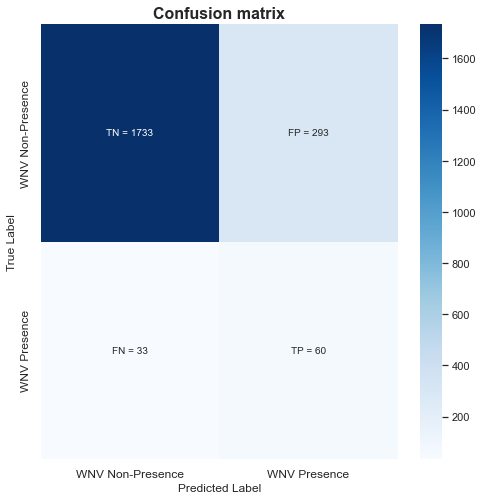

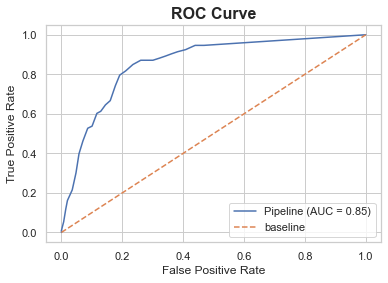

{'knn__algorithm': 'brute', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__n_neighbors': 30, 'knn__p': 1, 'knn__weights': 'uniform', 'sampling__k_neighbors': 30, 'sampling__sampling_strategy': 'minority'}
CPU times: total: 10.2 s
Wall time: 5.25 s


,KNN
roc_auc_train,0.9353
roc_auc_val,0.8550
f1_score,0.2691
precision,0.1700
sensitivity,0.6452
specificity,0.8554
false_pos,293.0000
true_pos,60.0000
false_neg,33.0000
true_neg,1733.0000


In [45]:
%%time
# Run the knn model 
best_model_knn, best_params_knn, metrics_knn = model_eval(knn_pipe, knn_params)
print(best_params_knn)

# Convert metrics result to dataframe
knn_df = pd.DataFrame.from_dict(metrics_knn, orient = 'index', columns = ['KNN'])
knn_df

## Model Comparison

In [46]:
# Create a dataframe to store the results from all models
model_list = [lr_df, rf_df, ada_df, gb_df, xgb_df, svc_df, knn_df]
model_df = pd.concat(model_list, axis = 1, join = "inner")
model_df

,Logistic Regression,Random Forest,Ada Boost,Gradient Boost,XGBoost,SVM,KNN
roc_auc_train,0.8385,0.9177,0.8771,0.9072,0.8762,0.8941,0.9353
roc_auc_val,0.8574,0.8781,0.8781,0.8737,0.8805,0.8767,0.8550
f1_score,0.2092,0.2966,0.3107,0.3388,0.3067,0.2496,0.2691
precision,0.1187,0.1847,0.1951,0.2271,0.1906,0.1484,0.1700
sensitivity,0.8817,0.7527,0.7634,0.6667,0.7849,0.7849,0.6452
specificity,0.6994,0.8475,0.8554,0.8959,0.8470,0.7932,0.8554
false_pos,609.0000,309.0000,293.0000,211.0000,310.0000,419.0000,293.0000
true_pos,82.0000,70.0000,71.0000,62.0000,73.0000,73.0000,60.0000
false_neg,11.0000,23.0000,22.0000,31.0000,20.0000,20.0000,33.0000
true_neg,1417.0000,1717.0000,1733.0000,1815.0000,1716.0000,1607.0000,1733.0000


Based on the results for the 7 models, the best model is XGBoost with a ROC AUC validation score of 0.8805.

## Feature Importance

To check which features have a stronger predicting power in determining whether the virus is present or not, we will look at the feature importance for the best model.

In [47]:
# Create a function to list the features importance for best model
def feature_importance(best_model, name, title):
    
    # Extract the feature importance from the best model
    importances = best_model.named_steps[name].feature_importances_
    feature_list = list(X.columns)
    feature_importance = sorted(zip(importances, feature_list), reverse = True)

    # Convert to dataframe and return the result. Subset to top 10 features for plotting
    df_feature = pd.DataFrame(feature_importance, columns = ['Coefficient', 'Feature'])
    df_feature_top10 = df_feature.head(10)

    # Plot the feature importance
    plt.figure(figsize = (10, 5))
    sns.barplot(data = df_feature_top10, y = 'Feature', x = 'Coefficient', orient = 'h', palette = 'coolwarm')
    plt.xlabel('Coefficient Values')
    plt.ylabel('Feature')
    plt.title('Top 10 Predictors', fontsize = 16, fontweight = 'bold')
    
    return df_feature

,Coefficient,Feature
0,0.195934,WnvRisk_low
1,0.193469,NightTime
2,0.160590,DayTime
3,0.066221,Week
4,0.054365,WnvRisk_high
5,0.037136,Species_CULEX RESTUANS
6,0.031191,AvgSpeed
7,0.029522,CsTS
8,0.025513,PrecipTotal
9,0.025158,Tavg


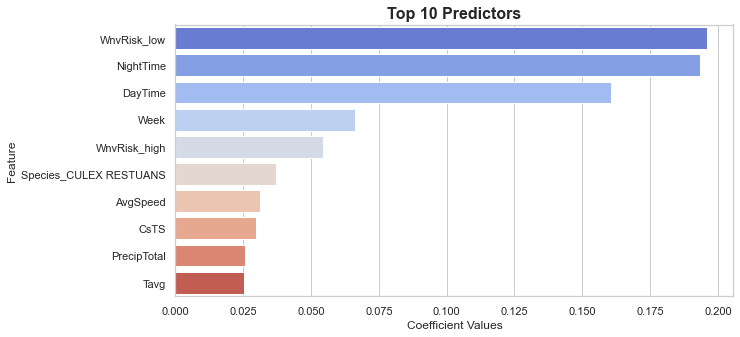

In [66]:
feature_importance(best_model_xgb, 'xgb', 'Feature Importance')

The top 3 predictors are WnvRisk_low, NightTime and DayTime.

## Prediction on Test Dataset

In [49]:
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 1 to 116293
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Latitude                        116293 non-null  float64
 1   Longitude                       116293 non-null  float64
 2   Week                            116293 non-null  int64  
 3   Tavg                            116293 non-null  float64
 4   DewPoint                        116293 non-null  int64  
 5   WetBulb                         116293 non-null  float64
 6   PrecipTotal                     116293 non-null  float64
 7   StnPressure                     116293 non-null  float64
 8   SeaLevel                        116293 non-null  float64
 9   ResultSpeed                     116293 non-null  float64
 10  ResultDir                       116293 non-null  int64  
 11  AvgSpeed                        116293 non-null  float64
 12  CsTSRA          

In [50]:
df_test_model.head()

,Latitude,Longitude,Week,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,CsTSRA,CsBR,CsRA,CsTS,RelativeHumidity,NightTime,DayTime,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,WnvRisk_low,WnvRisk_medium,WnvRisk_high
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,1,0,0,0,1
2,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,0,1,0,0,1
3,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,1,0,0,0,0,1
4,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,0,0,0,0,1
5,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,53.405643,8.833333,15.166667,0.0,0,0.0,0,0,0,0,0,1


In [51]:
df_test_predict = df_test_model.copy()

In [52]:
# Predict the df_test dataset using logistic regression
df_test_model['WnvPresent'] = best_model_lr.predict_proba(df_test_predict)[:, 1]
df_submission_lr = df_test_model[['WnvPresent']]

# Reset the index ('ID') to column
df_submission_lr = df_submission_lr.reset_index()

df_submission_lr

,Id,WnvPresent
0,1,0.270231
1,2,0.139443
2,3,0.308836
3,4,0.002366
4,5,0.002366
...,...,...
116288,116289,0.000366
116289,116290,0.000366
116290,116291,0.000366
116291,116292,0.000366


In [53]:
# Export data set to csv file
df_submission_lr.to_csv('../data/df_submission_lr.csv', index = False)

In [54]:
# Predict the df_test dataset using random forest
df_test_model['WnvPresent'] = best_model_rf.predict_proba(df_test_predict)[:, 1]
df_submission_rf = df_test_model[['WnvPresent']]

# Reset the index ('ID') to column
df_submission_rf = df_submission_rf.reset_index()

df_submission_rf

,Id,WnvPresent
0,1,0.023208
1,2,0.031397
2,3,0.026860
3,4,0.023543
4,5,0.023543
...,...,...
116288,116289,0.158296
116289,116290,0.158296
116290,116291,0.158296
116291,116292,0.158296


In [55]:
# Export data set to csv file
df_submission_rf.to_csv('../data/df_submission_rf.csv', index = False)

In [56]:
# Predict the df_test dataset using adaboost
df_test_model['WnvPresent'] = best_model_ada.predict_proba(df_test_predict)[:, 1]
df_submission_ada = df_test_model[['WnvPresent']]

# Reset the index ('ID') to column
df_submission_ada = df_submission_ada.reset_index()

df_submission_ada

,Id,WnvPresent
0,1,0.444018
1,2,0.440963
2,3,0.444386
3,4,0.439788
4,5,0.439788
...,...,...
116288,116289,0.487558
116289,116290,0.487558
116290,116291,0.487558
116291,116292,0.487558


In [57]:
# Export data set to csv file
df_submission_ada.to_csv('../data/df_submission_ada.csv', index = False)

In [58]:
# Predict the df_test_model dataset using gradient boost
df_test_model['WnvPresent'] = best_model_gb.predict_proba(df_test_predict)[:, 1]
df_submission_gb = df_test_model[['WnvPresent']]

# Reset the index ('ID') to column
df_submission_gb = df_submission_gb.reset_index()

df_submission_gb

,Id,WnvPresent
0,1,0.025156
1,2,0.014138
2,3,0.016637
3,4,0.018384
4,5,0.018384
...,...,...
116288,116289,0.076777
116289,116290,0.076777
116290,116291,0.076777
116291,116292,0.076777


In [59]:
# Export data set to csv file
df_submission_gb.to_csv('../data/df_submission_gb.csv', index = False)

In [60]:
# Predict the df_test dataset using xg boost
df_test_model['WnvPresent'] = best_model_xgb.predict_proba(df_test_predict)[:, 1]
df_submission_xgb = df_test_model[['WnvPresent']]

# Reset the index ('ID') to column
df_submission_xgb = df_submission_xgb.reset_index()

df_submission_xgb

,Id,WnvPresent
0,1,0.046756
1,2,0.015932
2,3,0.052493
3,4,0.012311
4,5,0.012311
...,...,...
116288,116289,0.001931
116289,116290,0.001931
116290,116291,0.001931
116291,116292,0.001931


In [61]:
# Export data set to csv file
df_submission_xgb.to_csv('../data/df_submission_xgb.csv', index = False)

In [62]:
# Predict the df_test dataset using SVM
df_test_model['WnvPresent'] = best_model_svc.predict_proba(df_test_predict)[:, 1]
df_submission_svc = df_test_model[['WnvPresent']]

# Reset the index ('ID') to column
df_submission_svc = df_submission_svc.reset_index()

df_submission_svc

,Id,WnvPresent
0,1,0.005960
1,2,0.005742
2,3,0.005748
3,4,0.005814
4,5,0.005814
...,...,...
116288,116289,0.035926
116289,116290,0.035926
116290,116291,0.035926
116291,116292,0.035926


In [63]:
# Export data set to csv file
df_submission_svc.to_csv('../data/df_submission_svc.csv', index = False)

In [64]:
# Predict the df_test dataset using KNN
df_test_model['WnvPresent'] = best_model_knn.predict_proba(df_test_predict)[:, 1]
df_submission_knn = df_test_model[['WnvPresent']]

# Reset the index ('ID') to column
df_submission_knn = df_submission_knn.reset_index()

df_submission_knn

,Id,WnvPresent
0,1,0.166667
1,2,0.000000
2,3,0.466667
3,4,0.000000
4,5,0.000000
...,...,...
116288,116289,0.033333
116289,116290,0.033333
116290,116291,0.033333
116291,116292,0.033333


In [65]:
# Export data set to csv file
df_submission_knn.to_csv('../data/df_submission_knn.csv', index = False)

## ROC AUC Score Comparison

|Model                  | Train ROC AUC | Validation ROC AUC | Test (Kaggle) ROC AUC |
|:----------------------|:--------------|:-------------------|:-------------|
|Logistic Regression    |0.8385         |0.8549              |0.7228
|Random Forest          |0.9184         |0.8757              |0.6336
|AdaBoost               |0.8752         |0.8813              |0.6514
|Gradient Boost         |0.9063         |0.8752              |0.6378
|XGBoost                |0.8762         |0.8805              |0.6638
|Support Vector Machine |0.8940         |0.8746              |0.6550
|k-Nearest Neighbours   |0.9349         |0.8565              |0.6208

We see a drop in the ROC AUC score when the model is used to predict the test dataset in Kaggle. One reason why a different set of results is obtained is because the test dataset is a much larger dataset as compared to the train dataset. Hence, our best model may not have sufficient data to train and predict in a large dataset. 

Based on the test (Kaggle) ROC AUC result, the Logistic Regression model has the best ROC AUC score instead of Ada Boost. This is likely due to the fact that logistic regressions tend to perform better than ensemble models when the data are linearly separable, i.e. the border separating data points from one category to another is a straight line instead of an oval or a very squiggly line separating one category from another.

## Cost Benefit Analysis

As we review the costs incurred against benefits derived annually, and especially when we heard rumours that our vendor, VDCI, may not be continuing for Option years 2023 and 2024, the data science team shares our Cost Benefit Analysis recommendations below.

Since the potentially benefits derived from alleviating this economic burden caused by the West Nile Virus of up to **USD 3,003,756** far outweighs the costs of our Mosquito Abatement Program's efforts for 2023 of **USD 520,698** by ~5.8 times ( = 3,003,756 / 520,698 ), we strongly recommend continuing with our Mosquito Abatement Program's efforts for 2023 and beyond. (Refer below for details.)

### Cost

#### Existing "SLE Vector Mosquito Abatement Program" Contract

According to Contract (PO) Number 17068 **"SLE Vector Mosquito Abatement Program"** ([*source*](http://ecm.cityofchicago.org/eSMARTContracts/service/DPSWebDocumentViewer?sid=EDGE&id=000032S5)) we awarded to [*Vector Disease Control International (VDCI)*](https://www.vdci.net/about-us/), a world leader in Integrated Mosquito Management (IMM) services, the costs associated for each year from 2018 to 2023 are summarised below:

| **Budget**                               | **Year 1**   | **Year 2** | **Year 3** | **Year 4** | **Year 5** | **Option Year 6** | **Option Year 6** |
|------------------------------------------|--------------|------------|------------|------------|------------|-------------------|-------------------|
|                                          |     **2018** |   **2019** |   **2020** |   **2021** |   **2022** |          **2023** |          **2024** |
| **<br>Estimated<br>Annual Fee<br>(USD)** | 448,819.70 * |    462,284 |    476,153 |    490,808 |    505,532 |           **520,698** |           **536,319** |
| **CPI %**                                |              |      3.00% |      3.00% |      3.08% |      3.00% |             3.00% |             3.00% |

\* Does not include the cost of pre-season catch basin treatments at USD2.52 per basin treated. The number to be treated, each year, will be determined after consultation with CDPH (Chicago Department of Public Health).

#### Summary of Contractor's Scope of Services and Time Limits for Performance

(Please refer to original awarded contract to Contractor, VDCI, for details.)

- **I. Conduct Environmental Surveillance**
  - Place and maintain ~ 100 traps from 01 Jun to 30 Sep each year.
  - Collect mosquitoes on twice-weekly basis from these traps (typically Tue and Wed each week).
  - Test mosquitoes weekly.
  - Maintain all required logs, test all traps and components to ensure proper functions, ensure batteries sufficiently charged.
- **II. Conduct Larviciding**
  - Initiate larviciding 01 May each year, treat all catch-basins and other mosquito breeding sites identified, place additional larvicide in locations identified by CDPH. All larviciding ends 30 Sep each year.
  - Geocode all locations treated with larvacide and display on a map, to be updated at least weekly.
- **III. Survey and Inspect Known or Suspected Mosquito Breeding Sites**
  - Survey and inspect to identify potential mosquito breeding sites and document findings on a map by 01 May each year, place larvicide and advise affected property owner.
- **IV. Conduct Adulticiding**
  - Adulticide within 48 hour notice by CDPH or CDA (Chicago Department of Aviation).
  - Geocode all areas treated with adulticide and display on a map by next business day.
- **V. Conduct Public Outreach**
  - Place door hangers on outside of homes in areas on day off or day prior to scheduled adulticiding.
  - Disseminate brochures and other public information materials to aldermanic offices, libraries and other locations.
- **VI. Conduct Quality Control**
  - Test all traps and components to ensure proper functions, ensure batteries sufficiently charged.
  - Run all appropriate controls during real-time Polymerase Chain Reaction (PCR) testing of mosquitoes.
  - Calibrate all adulticide application equipment and keep all calibrations logs.
  - Evaluate resistance to both larvacide and adulticide products using methodologies approved by CDPH and/or CDA.
- **VII. Maintain Logs, Compile and Report Data, and Prepare Maps and Reports**
  - Maintain log of all trap locations, all maintenance and testing performed on traps and batteries, number and type of mosquitoes collected, results of all PCR-testing, door hangers and brochures and other public information materials disseminated, submit relevant information into Disease Tracker Application, [*ZDT*](https://videal.com/cases/zdt-city-of-chicago/).
  - Geocode all locations treated with larvacide and display on a map, to update at least weekly.
  - Geocode all areas treated with adulticide and display on a map, make available to CDPH and CDA by next business day.
  - Prepare summary of results of environmental surveillance efforts from prior week by each Monday noon, and provide assessment of risk of human infection.
  - Provide final report summarizing environmental survillance, prevention and control activities, and recommendations for following year to CDPH and CDA by 31 Dec.
- **VIII. Provide Entomological Consultation**
  - Provide entomological consultation on all aspects of surveillance, prevention and control program.
- **IX. Purchase Equipment and Supplies**
  - Purchase, service and maintain all equipment and supplies necessary to conduct environmental surveillance, larviciding, adulticiding, survey and inspect potential mosquito breeding sites.

### Benefit:

Based upon the comprehensive "**Initial and Long-Term Costs of Patients Hospitalized with West Nile Virus Disease**" ([*Source*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/pdf/tropmed-90-402.pdf))  paper published by authors from the [*Centers for Disease Control and Prevention (CDC)*](https://www.cdc.gov/) dated 05 Mar 2014, we derived a provisionary projection for Total Economic Costs per individual in 2023 USD for patients with West Nile Virus disease by clinical syndrome below by projecting the associated costs from 2012 USD values found in this study at the assumed Consumer Price Index (CPI) of 3% per annum: 

<img src="../media/Total Economic Costs in 2023 USD.png" style="float: left; margin: 20px; height: 800px">

Total Economic Costs is used here as a proxy to the economic burden caused by the West Nile Virus (WNV) for quantitatively assessing the benefits potentially derived from our Mosquito Abatement Program's efforts.

### Analysis:

We summarise the number of Human Cases and Dead Birds through the most recent 10 years from 2012 to 2021 from the weekly "West Nile Virus Surveillance Reports"([*Source*](https://www.chicago.gov/city/en/depts/cdph/supp_info/infectious/west_nile_virus_surveillancereports.html)) below:

|                            | **2012** | **2013** | **2014** | **2015** | **2016** | **2017** | **2018** | **2019** | **2020** | **2021** |
|----------------------------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| **Human Cases**            |       22 |        1 |        6 |       16 |   **49** |        6 |       42 |        2 |       11 |       10 |
| **Human Cases (Fatality)** | -        | -        | -        |    **3** |        2 |        1 | -        | -        | -        | -        |
|                            |          |          |          |          |          |          |          |          |          |          |
| **Dead Birds**             |       25 |       10 |        7 |        4 |        4 |       14 |        7 |        6 |        2 |        9 |
| **Positive**               |        3 |        2 |        2 | -        | -        |        1 |        2 |        1 | -        | -        |
| **Unable to Test**         |        7 | -        |        1 |        2 |        2 |        3 |        2 | -        |        1 |        1 |
| **Pending**                | -        | -        | -        | -        | -        |        2 | -        |        2 | -        |        1 |
| **Negative**               |       15 |        8 |        4 |        2 |        2 |        8 |        3 |        3 |        1 |        7 |

Kindly note that the figures above for years 2015 and 2016 are more accurate than that for other years as they are the finalised figures for these 2 years. However, similar summaries from the other 8 years are unavailable and the corresponding figures above are likely underestimates of the actual statistics.

Nevertheless, the above information is still sufficient for our purpose of Cost Benefit Analysis.

- In the most recent 10 years from 2012 to 2021, 
  - The most number of **Human Cases** of **49** was recorded in year **2016**
  - The most number of **Human Cases resulting in Fatality** of **3** was recorded in year **2015**
<BR><BR>
- Assuming all things constant, 
  - **COST**:
    - Estimated cost of our Mosquito Abatement Program's efforts for 2023 would be comparable to that of our existing awarded contract to VDCI at **USD 520,698**.
  - **BENEFIT**:
    - In deriving the benefits, we assume the following **worst scenario** of:
       - **Total Human Cases** of **49** and **Total Death** of **2**
       - Based on the total case, the Total Economic Costs per individual in 2023 USD for patients with West Nile Virus disease by clinical syndrome of AFP would therefore be as high as **USD 3,003,756** ( = 3 x USD 1,001,252 ).
<BR><BR>
- Since the potentially benefits derived from alleviating this economic burden caused by the West Nile Virus of up to **USD 3,003,756** far outweighs the costs of our Mosquito Abatement Program's efforts for 2023 of **USD 520,698** by ~5.8 times ( = 3,003,756 / 520,698 ), we strongly recommend continuing with our Mosquito Abatement Program's efforts for 2023 and beyond.

## Recommendations


- Increase larviciding initiation at the location which has a high risk of West Nile Virus emergence (WnV case > 5). Current allocated resource is only for 190 acres which translates to 1 neighborhood. An additional 800 acres will cost approximately USD77,920.
- Lowering the threshold of adulticiding for the month of June and July, which is the month with high population growth. It will speed up the handling of adult mosquitoes findings and ultimately suppress the population of mosquitoes. An additional 100 miles costs approximately USD12,060 is needed.
- Conducting awareness roadshows within the neighborhood to make the residents more aware of the virus related information and they can help in reducing potential breeding location. Estimated Cost: USD 15,000

## Limitations

- The train and weather datasets provided is dated, ranging from 2007 to 2014. As the weather conditions may have changed due to global warming, updated datasets are necessary to reflect the current conditions. This will helps the model to better predict for the current year.
- The train dataset is much smaller than the test dataset resulting in a much lower ROC AUC test score. We will need to gather more data for model training.
- There is time constraint for hyperparameter tuning to obtain a better performing model.



## Future Plans

Moving forward, the team will:

- Check if the recommendation is effective or existing trend still persists, after implementing the new recommended spraying schedule and updated datasets.
- Obtain data on location and numbers of larvaes found and study the trend. This will helps us in proposing actions for potentially earlier prevention of mosquito breeding rather than to control for adult mosquitoes.
- Study both the environmental and health effects related to the insecticide that we have used for both larviciding and adulticiding.
- Study the potential impact of global warming on local weather, the growth of mosquitoes and the spread of WNV.
- Apply new techniques, such as Principal Component Analysis (PCA), for modeling. This will potentially help in treating the collinearity between the existing features.



## Conclusions

- Several models were run to analyse which model is the best model to predict the presence of the WNV mosquito. Our recommended model based on the ROC AUC validation score is AdaBoost.

- The cost for the contract is estimated to be ~ USD625,678 per year with the additional recommendations.

- The targeted mosquito abatement efforts include increasing larviciding initiations at high risk areas, lowering the threshold to activate adulticiding during July and August and conducting awareness roadshows before May.

Thus, we have met the goal of this project: 
- Developed a predictive model based on past data on weather conditions and virus detection locations.
- Brought focus to where and when pesticides should be sprayed that would effectively combat the WNV problem.
- Conducted a Cost Benefit Analysis to justify our recommendations.